<a href="https://colab.research.google.com/github/sanjaya999/Pytorch/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [216]:
import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("helper_function.py already exists")
else:
  print("downloading helper_function.py")
  request  = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py" , "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions , plot_decision_boundary


helper_function.py already exists


In [217]:
NUM_CLASSES = 4 #hyperparameters  at start of notebook is capital
NUM_FEATURES = 2
RANDOM_SEED = 42

In [218]:
X_blob, y_blob = make_blobs(n_samples=1000,
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES,
                             cluster_std=1.5,  # Correct parameter name
                             random_state=RANDOM_SEED)

In [219]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED
)

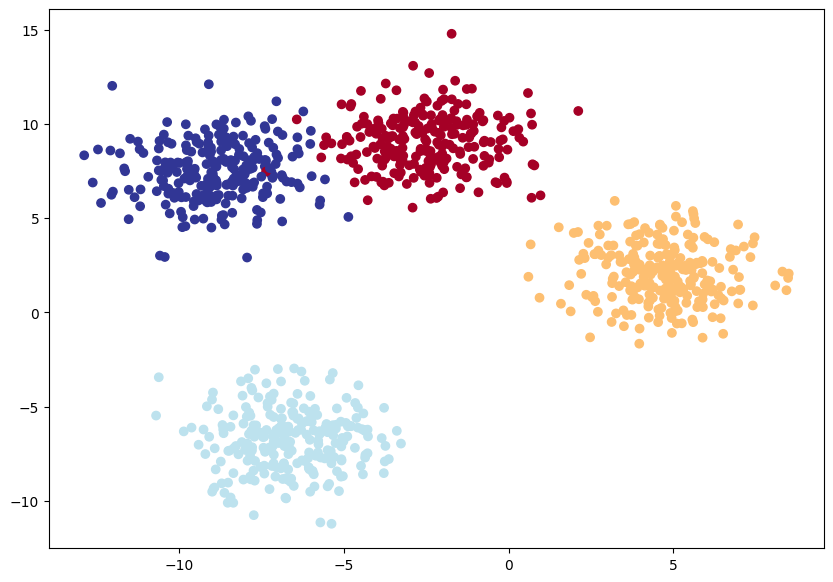

In [220]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0] , X_blob[:,1] , c=y_blob , cmap=plt.cm.RdYlBu)

In [221]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [222]:
#multiclass classification model
from torch import nn

class BlobModel(nn.Module):
  def __init__(self , input_features , output_features , hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=output_features)
    )
  def forward(self , x:torch.Tensor):
    return self.linear_layer_stack(x)

model_1 = BlobModel(input_features=NUM_FEATURES , output_features=NUM_CLASSES).to(device)
model_1


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [223]:
X_blob_train.shape , y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [224]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_1.parameters() , lr=0.01)

In [225]:
with torch.inference_mode():
  y_logits = model_1(X_blob_test.to(device))
y_pred[:10]

tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])

In [226]:
#conver logits to pred prob

y_pred_prob = torch.softmax(y_logits, dim =1)
y_pred_prob[:10] , y_logits[:10]


(tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463],
         [0.3381, 0.1358, 0.1929, 0.3331],
         [0.2867, 0.1841, 0.2861, 0.2431],
         [0.3554, 0.1355, 0.1740, 0.3351],
         [0.3009, 0.1841, 0.2779, 0.2371],
         [0.3595, 0.1350, 0.1695, 0.3360]]),
 tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]]))

In [227]:
#convert our model prediction  probabilities to prediction labels
y_preds = torch.argmax(y_pred_prob , dim=1)
y_preds , y_blob_test

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 1, 0, 1]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3,

In [228]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [229]:
#createing a testing loop
torch.manual_seed(42)
epochs = 10000

X_blob_train , y_blob_train = X_blob_train.to(device) , y_blob_train.to(device)
X_blob_test , y_blob_test = X_blob_test.to(device) , y_blob_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_blob_train)

  y_pred = torch.softmax(y_logits , dim=1).argmax(dim=1)
  loss = loss_fn(y_logits , y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_blob_test)
    test_pred = torch.softmax(test_logits , dim=1).argmax(dim=1)
    #print(f"Epoch : {epoch} | Loss : {loss} | Acc : {acc}")

#

In [230]:
#make predictions
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_blob_test)
y_logits[:10]

tensor([[ -2.4298,  10.8985, -10.1634, -11.2595],
        [ -2.1959,  -9.4513,  -6.2978,   5.2127],
        [ -5.0177,  -5.4211,   5.3746,  -4.3392],
        [ -3.0617,   8.1195,  -5.4886,  -6.6427],
        [  6.4678,  -2.9239, -12.2784,  -8.4364],
        [ -2.7798, -11.1568,  -7.4583,   6.3738],
        [ -4.3848,  -4.6146,   4.6696,  -3.6060],
        [  5.7688,  -6.7762,  -9.7162,  -4.1394],
        [ -6.4314,  -6.9831,   6.6665,  -5.5678],
        [  6.2783,  -5.5532, -10.3133,  -5.4605]])

In [231]:
#logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits , dim=1)
y_pred_probs[:10]

tensor([[1.6278e-06, 1.0000e+00, 7.1276e-10, 2.3819e-10],
        [6.0563e-04, 4.2778e-07, 1.0017e-05, 9.9938e-01],
        [3.0665e-05, 2.0486e-05, 9.9989e-01, 6.0437e-05],
        [1.3935e-05, 9.9998e-01, 1.2305e-06, 3.8805e-07],
        [9.9992e-01, 8.3406e-05, 7.2214e-09, 3.3663e-07],
        [1.0582e-04, 2.4350e-08, 9.8345e-07, 9.9989e-01],
        [1.1681e-04, 9.2831e-05, 9.9954e-01, 2.5453e-04],
        [9.9995e-01, 3.5625e-06, 1.8834e-07, 4.9765e-05],
        [2.0496e-06, 1.1806e-06, 9.9999e-01, 4.8608e-06],
        [9.9998e-01, 7.2714e-06, 6.2279e-08, 7.9776e-06]])

In [232]:
y_preds = torch.argmax(y_pred_probs , dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

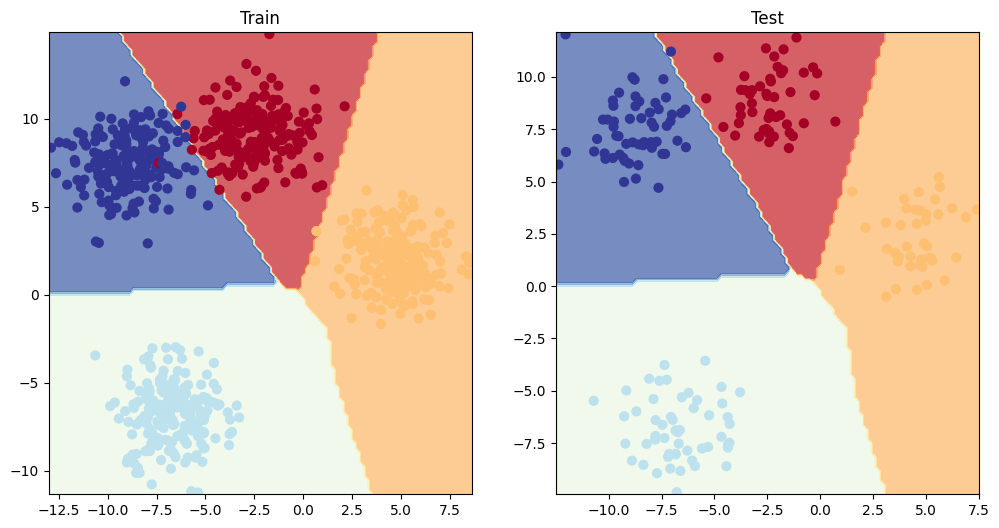

In [233]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1 , X_blob_train , y_blob_train)
plt.subplot(1,2,2)

plt.title("Test")
plot_decision_boundary(model_1 , X_blob_test , y_blob_test)